<a href="https://colab.research.google.com/github/SusannaValentina/Fairness/blob/master/Esperimenti/prova1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

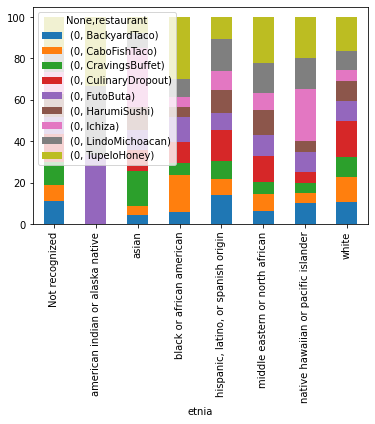

In [14]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import json
import pandas as pd
import csv
import matplotlib.pyplot as plt

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Relevance'

relevance = '1nwGbyk8q2S-0BkLcyFVqdK6emTooxHJv'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': relevance})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

restaurant = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

#restaurant.plot(kind='bar',x='name',y='num_children',ax=ax)
#restaurant.groupby('ethnicity')['user_id'].nunique().plot(kind='bar')

restaurant.assign(dummy = 1).groupby(['ethnicity','restaurant']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar',stacked=True,legend=True)

plt.xlabel('etnia')

# disable ticks in the x axis
#plt.xticks([])

# fix the legend or it'll include the dummy variable
#current_handles, _ = plt.gca().get_legend_handles_labels()
#reversed_handles = reversed(current_handles)
#correct_labels = reversed(restaurant['restaurant'].unique())

#plt.legend(reversed_handles,correct_labels)

plt.show()
